In [1]:
from scipy.io import loadmat
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import pyinform as pyinform
import pwlf

import ieeg_processing as ieeg

In [6]:
# Load data
data_mat = loadmat('../data/ID11_60h.mat')
info_mat = loadmat('../data/ID11_info.mat')
fs = info_mat['fs']
sample_begin = int(5*60*fs)
sample_end = sample_begin + int(60*fs)
data_raw = data_mat['EEG'][:, sample_begin:sample_end].transpose()
data_raw = data_raw[:10000, :4]

In [7]:
t_shift = int(0.2*fs)  # samples
h2 = np.zeros((data_raw.shape[1], data_raw.shape[1]))
r = np.zeros((data_raw.shape[1], data_raw.shape[1]))
h2_x_to_y = np.zeros((data_raw.shape[1], data_raw.shape[1]))
r_x_to_y = np.zeros((data_raw.shape[1], data_raw.shape[1]))
h2_shift_list = []
r_shift_list = []

for i in range(data_raw.shape[1]):
    for j in range(data_raw.shape[1]):
        print('compute i, j: ' + str(i) + ', ' + str(j))
        h2[i, j], r[i, j], h2_x_to_y[i, j], r_x_to_y[i, j], h2_shift, r_shift = ieeg.correlation_metrics(data_raw[:, i], data_raw[:, j], t_shift=t_shift)
        h2_shift_list.append(h2_shift)
        r_shift_list.append(r_shift)

compute i, j: 0, 0
compute i, j: 0, 1
compute i, j: 0, 2
compute i, j: 0, 3
compute i, j: 1, 0
compute i, j: 1, 1
compute i, j: 1, 2
compute i, j: 1, 3
compute i, j: 2, 0
compute i, j: 2, 1
compute i, j: 2, 2
compute i, j: 2, 3
compute i, j: 3, 0
compute i, j: 3, 1
compute i, j: 3, 2
compute i, j: 3, 3


In [18]:
print(h2)
print(r)

[[1.         0.96140885 0.86273061 0.78170513]
 [0.96287071 1.         0.92608114 0.83140624]
 [0.85019536 0.9212674  1.         0.95725522]
 [0.7758053  0.8293719  0.95881765 1.        ]]
[[1.         0.96257879 0.85777845 0.74709077]
 [0.96257879 1.         0.92451112 0.81296442]
 [0.85777845 0.92453094 1.         0.95844403]
 [0.74716415 0.81308937 0.95845843 1.        ]]


In [3]:
# Normalizing
ssc = StandardScaler()
data_ssc = ssc.fit_transform(data_raw)

mmsc = MinMaxScaler(feature_range=(0, 1))
data_mmsc = mmsc.fit_transform(data_raw)

data_global_ssc = (data_raw - np.mean(data_raw))/np.std(data_raw)

X = data_raw
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
data_global_mmsc = X_std * (np.max(X) - np.min(X)) + np.min(X)

<Figure size 1080x1080 with 0 Axes>

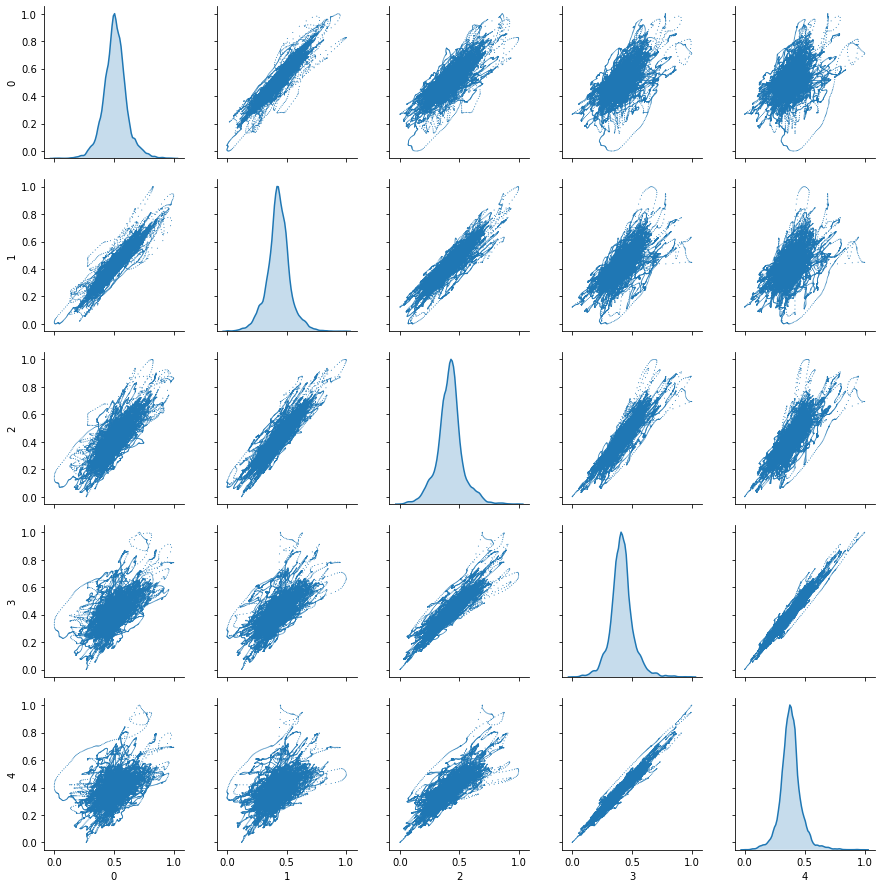

In [10]:
data_mmsc[:,3] = 1/(1 + np.exp(-data_mmsc[:,3]*8)) 
df = pd.DataFrame(data_mmsc[:, :5])
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde', plot_kws={'color': 'tab:blue', 's': 1, 'edgecolor': 'none', 'alpha': 1})
#plt.savefig('distribution.png')

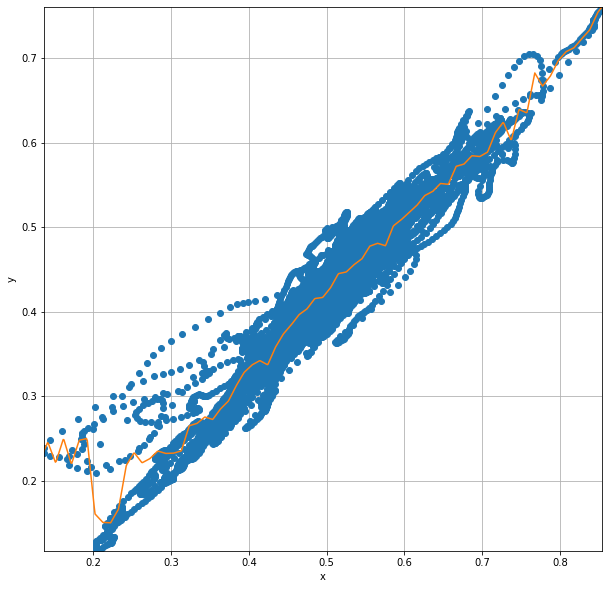

ValueError: Shape mismatch: a and b should have the same number of rows (9796 != 0).

In [14]:
x = data_mmsc[:10000,0]
y = data_mmsc[:10000,1]
t_shift = int(0.1*fs)  # samples

break_locations = np.linspace(0, 1, num=100)
my_pwlf = pwlf.PiecewiseLinFit(x, y)
my_pwlf.fit_with_breaks(break_locations)

xHat = np.linspace(0, 1, num=1000)
yHat = my_pwlf.predict(xHat)

plt.figure(figsize=(10,10))
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))
plt.xlabel('x'), plt.ylabel('y')
plt.grid()
plt.show()

h2_shift = []

for i in range(2*t_shift):
    y_win = y[2*t_shift-i:-i]
    x_win = x[t_shift:-t_shift]
    g = pwlf.PiecewiseLinFit(x_win, y_win)
    g.fit_with_breaks(break_locations)
    E = np.mean(y_win - g.predict(x_win))  # Uniform distribution
    h2_shift.append(1 - E / np.var(y_win))

plt.figure()
plt.plot(h2_shifted)
plt.grid()
    


In [12]:
len(x[:-3])

9997

In [10]:
t_shift = int(0.1*fs)
t_shift

102

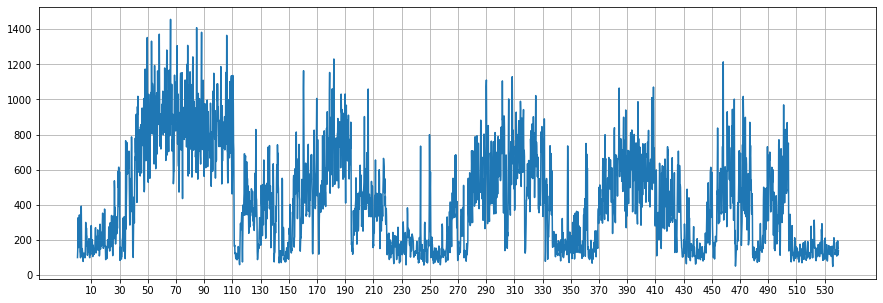

In [7]:
swa = np.mean(Sxx_band_tukey, axis=0)
plt.figure(figsize=(15, 5))
plt.xticks(np.arange(t[0], t[-1]/60, 20))
#plt.ylim(0,250)
#plt.xlim(170, 190)
plt.plot(t/60, swa)
plt.grid()
plt.savefig('ID08N3.png')


In [15]:
fs

1024.0

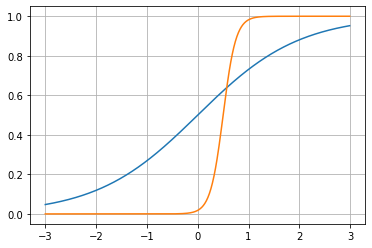

In [3]:
x = np.arange(-3, 3, 0.01)
y = 1/(1 + np.exp(-x))
y_new = 1/(1 + np.exp(-8*(x-0.5)))
plt.plot(x, y)
plt.plot(x, y_new)
plt.grid()

In [8]:
max

<function max>